In [1]:
import gym
from gym import wrappers
from stable_baselines3 import A2C

In [2]:
import io
import base64
from IPython.display import HTML

def show_video_replay(env):
    video = io.open('./gym-results/openaigym.video.%s.video000000.mp4' % env.file_infix, 'r+b').read()
    encoded = base64.b64encode(video)
    return HTML(data='''
        <video width="360" height="auto" alt="test" controls><source src="data:video/mp4;base64,{0}" type="video/mp4" /></video>'''
    .format(encoded.decode('ascii')))

In [3]:
import matplotlib
import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline

class GIFRender():
    def __init__(self, env, size=(9,9)):
        plt.figure(figsize=size)
        self.img = plt.imshow(env.render(mode='rgb_array')) # only call this once
        
    def update(self):
        self.img.set_data(env.render(mode='rgb_array')) # just update the data
        display.display(plt.gcf())
        display.clear_output(wait=True)
  

In [4]:
env = gym.make("SpaceInvaders-v0")
#env = wrappers.Monitor(env, "./gym-results", force=True)

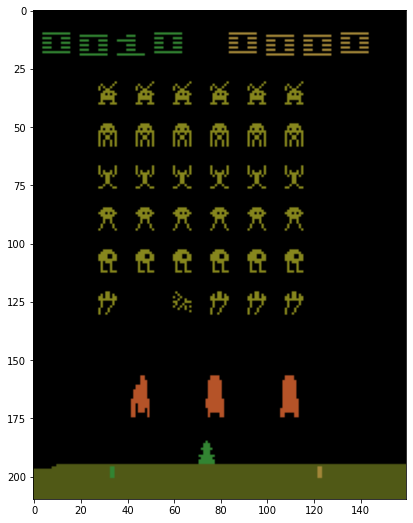

In [5]:
obs = env.reset()
gif_renderer = GIFRender(env)
for _ in range(100):
    gif_renderer.update()
    env.step(env.action_space.sample()) # take a random action
env.close()

In [6]:
show_video_replay(env)

AttributeError: 'AtariEnv' object has no attribute 'file_infix'

In [ ]:
env.file_infix